# **Stress level detection - Model**




Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import classification_report

print("Libraries has been imported successfully")

Libraries has been imported successfully


Load dataset

In [ ]:
data = pd.read_csv('merged_featureExtracted_ds.csv')
data.sample(40)

,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G2Fp 1,G2F 3,G2P 3,Status,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
125,126,-0.629957,-0.605169,-0.663971,-0.583083,-0.693603,-0.686529,0.165475,0.576460,0.730119,...,-0.781579,-0.286019,-0.190384,Low,0.159847,0.122154,-0.195477,-0.377960,0.075496,-0.216008
400,401,0.250658,0.447870,0.387214,0.153178,0.282433,0.400686,-0.122825,-0.082008,-0.124819,...,0.220119,-0.182117,0.060067,Medium,-0.291583,-0.206378,-0.087266,0.292062,-0.220722,-0.014048
641,642,0.214359,0.349607,0.240606,0.391765,0.477340,0.097673,-0.234914,-0.381396,-0.360255,...,0.554257,0.676746,-0.073732,High,0.055775,0.019860,0.357642,0.196078,0.099025,0.058352
342,343,0.397492,0.530345,0.728890,0.351388,0.228214,0.313730,-0.246782,-0.153802,-0.164493,...,0.310109,-0.232257,-0.006543,Medium,-0.219898,-0.197890,-0.050890,0.032020,-0.129221,0.054935
326,327,0.279487,0.566107,0.426869,0.227171,0.504300,0.153541,-0.313293,-0.173759,-0.208028,...,0.355841,-0.146955,0.069622,Medium,-0.216992,-0.231495,-0.073800,0.260346,-0.183913,0.023741
472,473,0.536224,0.530797,0.733936,0.182164,0.520695,0.088803,-0.349951,-0.199936,-0.161914,...,0.456587,-0.140120,-0.017037,Medium,-0.280325,-0.180484,-0.071561,0.111404,-0.202871,0.060821
63,64,1.048548,0.959938,0.282774,-0.606491,-0.244991,0.841933,-0.409641,-0.405091,-0.759789,...,-0.368264,-0.682011,-0.439556,Medium,-0.270115,-0.229356,-0.366096,-0.386223,-0.241869,-0.259573
238,239,-0.554140,-0.566089,-0.509500,-0.593544,-0.648683,-0.595594,0.170107,0.616947,0.601397,...,-0.759983,-0.390852,-0.143652,Low,0.050386,0.089224,-0.186065,-0.561452,0.046831,-0.296720
340,341,0.385614,0.505410,0.280928,0.226412,0.309559,0.104429,-0.294858,-0.132820,-0.112730,...,0.232942,-0.186354,-0.016031,Medium,-0.255867,-0.193722,-0.059982,0.357321,-0.219826,0.038604
610,611,0.487497,0.375686,0.349251,0.300891,0.482024,0.242081,-0.132747,-0.352683,-0.389994,...,0.541519,0.671931,-0.009812,High,0.108468,-0.027797,0.238381,0.155010,0.241675,-0.023703


Splitting training and testing data

In [ ]:
X = data.drop(['Status'], axis=1)
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data\n")
X_train.head(40)

Training Data



,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G1P 3,G2Fp 1,G2F 3,G2P 3,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
56,57,0.124381,0.830277,0.885704,0.597663,0.820755,3.890242,0.676080,-0.836949,-0.724523,...,1.751741,2.592230,4.223526,6.898427,-0.696890,-0.554901,-0.615962,-0.770891,-0.577934,-0.396851
204,205,-0.589507,-0.655006,-0.733994,-0.635905,-0.683116,-0.673032,0.272623,0.572963,0.705808,...,-0.347225,-0.746622,-0.343285,-0.160136,0.044734,0.166688,-0.150247,-0.359750,0.041799,-0.219173
319,320,0.385587,0.271830,0.706976,0.211833,0.142646,0.275882,-0.194455,-0.185760,-0.143453,...,0.043755,0.292705,-0.108704,-0.023539,-0.225490,-0.177615,-0.108104,0.156962,-0.215452,0.075799
529,530,0.250236,0.196047,0.280798,0.297383,0.566172,-0.038061,-0.256846,-0.265533,-0.361775,...,0.405710,0.509505,0.511846,0.042019,0.066911,0.013803,0.344869,0.209658,0.227327,0.069628
24,25,-1.085780,-1.144668,-1.281798,-1.236716,-1.183783,-1.312180,-0.351053,-1.203583,-0.936555,...,-1.125006,-0.637556,-0.634537,-0.525828,-0.607979,-0.479528,-0.372658,0.017515,-0.386104,-0.059460
231,232,-0.626272,-0.655765,-0.629945,-0.478977,-0.608685,-0.512762,0.325508,0.729481,0.908075,...,-0.277435,-0.748832,-0.371794,-0.252306,0.111191,0.076072,-0.198944,-0.476798,0.014373,-0.270760
174,175,-0.552531,-0.486521,-0.596779,-0.633757,-0.588151,-0.442399,0.035334,0.573829,0.700662,...,-0.410456,-0.731867,-0.315320,-0.217100,0.124660,0.167959,-0.190139,-0.288429,-0.055430,-0.234559
296,297,-0.545122,-0.490957,-0.664862,-0.627922,-0.609399,-0.476690,0.191993,0.967966,0.989667,...,-0.429212,-0.724299,-0.330690,-0.200388,0.170092,0.163956,-0.179517,-0.394921,0.052890,-0.219578
630,631,0.321849,0.512461,0.523411,0.311950,0.584545,0.257990,-0.255527,-0.416583,-0.314361,...,0.549041,0.496893,0.487182,-0.043976,0.091150,-0.040453,0.183948,0.186520,0.098636,-0.056703
545,546,0.336482,0.262937,0.553107,0.690516,0.403516,0.367980,-0.253084,-0.397261,-0.373108,...,0.493155,0.252481,0.551238,-0.001596,0.028523,-0.056059,0.194475,0.142065,0.156009,-0.011771


In [ ]:
print("Testing Data")
X_test.head(40)

Testing Data


,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G1P 3,G2Fp 1,G2F 3,G2P 3,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
120,121,-0.543955,-0.610149,-0.569390,-0.555760,-0.758603,-0.518147,0.033366,0.529492,0.829025,...,-0.441094,-0.720776,-0.421201,-0.279334,0.126411,0.072146,-0.223085,-0.346742,-0.057624,-0.296900
331,332,0.267412,0.384454,0.672306,0.424713,0.168361,0.126170,-0.214594,-0.188352,-0.215303,...,-0.096837,0.471548,-0.276530,0.015879,-0.257415,-0.180570,-0.137498,-0.002301,-0.130511,-0.043462
39,40,-1.163532,-1.261538,-1.291269,-1.114280,-1.117159,-1.020885,-0.010663,0.396476,-0.350149,...,-1.254971,-0.048045,-0.669566,-0.569095,-0.554632,-0.430772,-0.471246,-0.702082,-0.294628,-0.375755
636,637,0.430595,0.286245,0.228501,0.647207,0.661863,0.195628,-0.162290,-0.296435,-0.374553,...,0.571658,0.466255,0.662004,0.093293,0.091609,0.021974,0.360215,0.084472,0.153469,0.033057
514,515,0.365613,0.380900,0.588533,0.209394,0.158633,0.234271,-0.350672,-0.232492,-0.315301,...,0.161995,0.483418,-0.267476,-0.032271,-0.257481,-0.208549,-0.105973,0.325811,-0.167815,0.029595
532,533,0.344539,0.177265,0.347424,0.323372,0.493710,0.317646,-0.197095,-0.376417,-0.421283,...,0.461281,0.353980,0.469972,0.110679,0.066294,0.050605,0.321690,-0.033972,0.243594,0.042891
65,66,-0.303938,-0.293349,-0.089828,-0.748490,-0.745952,-0.138984,-0.243662,-0.536163,-0.137565,...,1.968080,0.217393,-0.312211,1.883481,0.867952,0.756166,-0.306124,0.175248,-0.380020,0.070601
500,501,0.489309,0.593333,0.275563,0.257602,0.523813,0.104464,-0.190370,-0.192778,-0.132027,...,0.040205,0.419238,-0.145697,-0.021793,-0.227864,-0.194636,-0.115015,0.140631,-0.151680,0.059267
78,79,-0.587400,-0.435372,-0.451920,-0.521757,-0.307366,1.129596,0.008672,-0.324055,-0.637790,...,-0.589668,1.237347,-0.186931,0.408153,3.215215,4.254597,0.224010,-1.682817,5.275225,-0.602314
654,655,0.404986,0.234030,0.481229,0.578477,0.628704,-0.033249,-0.070985,-0.355396,-0.435655,...,0.419660,0.427730,0.491634,0.005635,0.084130,0.028836,0.255875,0.087587,0.246620,0.044932


Encoding target value

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(y_train_encoded)

[2 1 2 0 1 1 1 1 0 0 0 0 2 1 0 2 2 1 0 1 1 2 0 2 1 2 2 2 1 1 0 1 2 0 1 0 2
 0 1 2 2 1 1 0 2 0 0 1 1 0 0 2 0 1 2 0 0 0 0 0 1 0 1 0 0 2 0 2 2 1 1 1 2 2
 2 1 2 0 2 1 2 0 1 1 0 2 1 2 1 2 2 0 1 0 2 2 2 2 1 1 0 2 2 1 2 2 2 1 1 2 0
 1 0 2 1 1 1 1 0 0 2 0 1 2 0 0 0 2 1 0 2 1 2 2 1 2 2 1 1 1 0 0 0 1 0 1 1 1
 0 1 2 2 1 0 1 2 0 1 2 1 2 2 0 0 1 0 0 1 2 1 1 0 0 0 2 0 2 0 2 0 2 1 1 2 0
 1 1 0 0 1 2 2 0 2 2 0 1 1 0 2 1 1 0 1 0 1 1 1 0 1 0 2 1 1 2 1 1 1 2 2 1 0
 2 1 0 0 2 0 1 1 1 0 2 1 2 0 1 2 0 0 0 1 1 2 0 2 0 0 2 1 0 2 2 0 1 1 2 0 0
 1 2 2 1 0 1 0 1 0 1 1 0 1 2 2 1 1 1 1 0 2 2 1 0 0 0 1 0 0 2 2 0 0 0 0 2 2
 1 2 1 1 1 2 2 2 0 2 1 2 2 1 2 0 0 2 2 0 0 2 0 2 0 0 2 1 2 0 1 2 2 0 0 1 0
 1 2 1 1 1 0 0 2 2 0 2 0 0 1 0 1 2 2 1 2 0 2 0 1 0 2 0 1 1 2 2 2 1 1 2 1 1
 0 0 0 2 2 2 1 1 0 1 0 1 1 1 2 1 1 1 2 1 2 0 1 2 0 0 1 0 0 0 0 2 0 2 1 2 2
 0 1 0 2 1 0 1 2 0 2 1 1 2 2 1 0 0 2 2 2 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 1 0 2 0 0 1 2 2 0 1 1 0 0 0 0 2 2 2 1 1 1 1 0 1 2 2 1 2 2 0 2 1 2 2 1 0
 0 2 1 1 2 2 2 1 1 2 2 1 

XGBoost Classifier Initialization

In [ ]:
model = xgb.XGBClassifier()

Training the model

In [ ]:
model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# **Evaluation and Validation**

Evaluate the Model

In [ ]:
y_pred_encoded = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy with XGBoost Classifier:", accuracy)

# Calculate precision, recall, and F1 score
report_dict = classification_report(y_test_encoded, y_pred_encoded, output_dict=True, zero_division=0)

# Extract precision, recall, and F1-score for each class
class_metrics = []
for class_label, metrics in report_dict.items():
    if class_label != 'accuracy' and class_label not in ['macro avg', 'weighted avg']:
        class_metrics.append([class_label, metrics['precision'], metrics['recall'], metrics['f1-score']])

# Print in table format
print(tabulate(class_metrics, headers=['Class', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))

Accuracy with XGBoost Classifier: 0.9583333333333334
+---------+-------------+----------+------------+
|   Class |   Precision |   Recall |   F1-score |
+=========+=============+==========+============+
|       0 |    1        | 0.916667 |   0.956522 |
+---------+-------------+----------+------------+
|       1 |    0.897959 | 1        |   0.946237 |
+---------+-------------+----------+------------+
|       2 |    0.980392 | 0.961538 |   0.970874 |
+---------+-------------+----------+------------+


Graph plotting

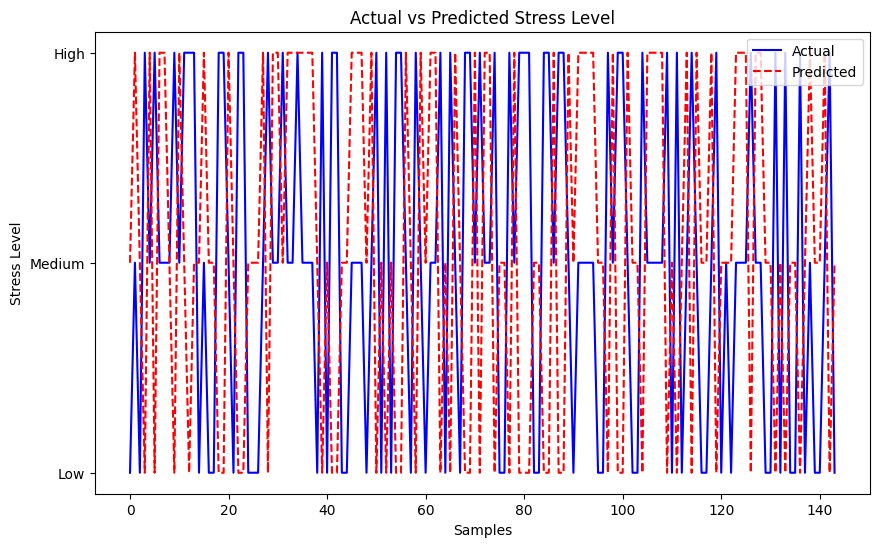

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_encoded, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Stress Level')
plt.title('Actual vs Predicted Stress Level')
plt.legend()
plt.show()
